# 학습목표

- FeedPropagation과 BackPropagation을 이해할 수 있다.
- 위 과정의 수식을 이해하고, 수식을 코드화 할 수 있다.
- Xavier Initialization를 이해할 수 있다.
- 남이 짜 놓은 코드를 빠르게 이해하고 습득할 수 있다.


# Import Library

In [10]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import pandas as pd
import time

# Declare NeuralNet class

In [11]:
# NeuralNet
class NN:
    
    # 생성자
    # 필요한 변수 nodes of layer and weights and function.
    def __init__(self,inputnodes, hiddennodes,outputnodes,learningrate):
        
        self.inodes = inputnodes # 784
        self.hnodes = hiddennodes # 150
        self.onodes = outputnodes # 10
        self.lr = learningrate # 
        # 
        # 
        self.wih=np.random.normal(0.0,pow(2/(self.inodes+self.hnodes),-0.5),(self.hnodes,self.inodes)) 
        self.who=np.random.normal(0.0,pow(2/(self.hnodes+self.onodes),-0.5),(self.onodes,self.hnodes))
        # activation function
        self.activation_function = lambda x :scipy.special.expit(x)
        
    
    #
    def train(self,inputs_list,targets_list):
#         print(f"Weights IH shape : {self.wih.shape}")
#         print(f"Weights HO shape : {self.who.shape}")
        
        # forward propagation
        
        
        # input과 target을 받아와 numpy array로 변환 
        inputs =np.array(inputs_list,ndmin=2).T
        targets = np.array(targets_list,ndmin=2).T
#         print(f"inputs shape : {inputs.shape}")
#         print(f"targets shape : {targets.shape}")
        # calc on hidden_layer
        hidden_inputs = np.matmul(self.wih,inputs)
#         print(f"hidden_inputs shape : {hidden_inputs.shape}")
        hidden_outputs = self.activation_function(hidden_inputs)
#         print(f"hidden_outputs shape : {hidden_outputs.shape}")
        
        # calc on output_layer
        final_inputs = np.matmul(self.who,hidden_outputs)
#         print(f"final_inputs shape : {final_inputs.shape}")
        final_outputs = self.activation_function(final_inputs)
#         print(f"final_outputs shape : {final_outputs.shape}")
        
        # error
        target_errors = targets-final_outputs
        
        
        # back_Propagation
        
        # hidden layer error derived from target_error
        hidden_errors=np.matmul(np.transpose(self.who),target_errors)
        # update weights between hidden and output layer
        self.who = self.who + self.lr*np.matmul(target_errors*final_outputs*(1-final_outputs),np.transpose(hidden_outputs))
        
        # update weights between input and hidden layer
        self.wih = self.wih + self.lr*np.matmul(hidden_errors*hidden_outputs*(1-hidden_outputs),np.transpose(inputs))
        pass
    
    

    def query(self,inputs_list) :
        inputs = np.array(inputs_list,ndmin=2).T
        hidden_inputs = np.matmul(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.matmul(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

        

# Set HyperParams

In [12]:
input_nodes = 784
hidden_nodes = 150
output_nodes = 10 #0~9 구분가능하게
learningrate = 0.5

# create Neural Net with HyperParams
n = NN(input_nodes,hidden_nodes,output_nodes,learningrate)



# Load dataSet

In [13]:
training_data_file = open("mnist_dataset/mnist_train.csv")
training_data_list = training_data_file.readlines()
training_data_file.close()
test_data_file = open("mnist_dataset/mnist_test.csv")
test_data_list=test_data_file.readlines()
test_data_file.close()

# Stochastic Gradient Descent

sc's performance= 0.8178
35.55909490585327 seconds for 1 epoches
sc's performance= 0.8268
40.562232971191406 seconds for 1 epoches
sc's performance= 0.8408666666666667
42.397109031677246 seconds for 1 epoches
sc's performance= 0.847775
43.48913884162903 seconds for 1 epoches
sc's performance= 0.85404
43.31302809715271 seconds for 1 epoches
sc's performance= 0.8581
43.07139492034912 seconds for 1 epoches
sc's performance= 0.8621142857142857
44.38589286804199 seconds for 1 epoches
sc's performance= 0.8652625
45.122387170791626 seconds for 1 epoches
sc's performance= 0.8681888888888889
46.903347969055176 seconds for 1 epoches
sc's performance= 0.8704
44.44703793525696 seconds for 1 epoches


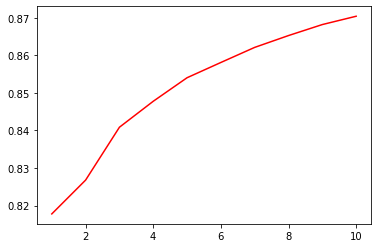

In [14]:
epoches = 10
sc_scorecard=[] # stochastic grdadient 점수카드
sc_score_array = []
epoches_array = []
start = time.time()

for epoch in range(epoches):    
    
    epoches_array.append(epoch+1)
    # train
    for record in training_data_list : 
        # split csv index by ',' 
        all_values = record.split(',')
        
        # input min-max scaling 0-255 => 0.01~1 
        inputs = np.asfarray(all_values[1:])/255.0*0.99+0.01
        
        # make target array
        targets = np.zeros(output_nodes)
        targets[int(all_values[0])] = 1
        
        n.train(inputs,targets)
    
    for record in test_data_list :
        # input and tarkget
        all_values=record.split(',')
        correct_label=int(all_values[0])
        inputs=(np.asfarray(all_values[1:])/255.0*0.99)+0.01
        outputs = n.query(inputs)
        label=np.argmax(outputs)

        if (label==correct_label) : 
            sc_scorecard.append(1)
        else:
            sc_scorecard.append(0)
            
    
    
    sc_scorecard_array=np.asarray(sc_scorecard)
    sc_score = sc_scorecard_array.sum()/sc_scorecard_array.size
    
    print("sc's performance=",sc_score)
    
    sc_score_array.append(sc_score)
    
    
    # estimate time 
    finish = time.time()
    print(f"{finish-start} seconds for 1 epoches")
    start = time.time()

# make a plot
plt.plot(epoches_array,sc_score_array,'r')

score_data = pd.DataFrame(data = {"SGD(score)" : sc_score_array},index=epoches_array)

# Mini Batch 

In [6]:
class NN:
    def __init__(self,inputnodes, hiddennodes,outputnodes,learningrate) :   #초기화 함수
        
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        
        self.wih = np.random.normal(0.0,pow(2/(self.inodes+self.hnodes),-0.5),(self.hnodes,self.inodes))
        self.who = np.random.normal(0.0,pow(2/(self.inodes+self.hnodes),-0.5),(self.onodes,self.hnodes))
        
        self.activation_function = lambda x :scipy.special.expit(x)
        
        pass
    
    
    def train(self,inputs_list,targets_list):
        #WHO WIH를 업데이트함
        inputs =np.array(inputs_list,ndmin=2).T  #인풋배열만들기
        targets = np.array(targets_list,ndmin=2).T #결과배열만들기
        
        hidden_inputs = np.matmul(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.matmul(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        
        final_errors = targets-final_outputs
        hidden_errors=np.matmul(np.transpose(self.who),final_errors)        
        
        deltaho =self.lr*np.matmul(final_errors*final_outputs*(1-final_outputs),np.transpose(hidden_outputs))
        deltaih =self.lr*np.matmul(hidden_errors*hidden_outputs*(1-hidden_outputs),np.transpose(inputs))

        return deltaho,deltaih
    
    
    
    def update(self,ho,ih):
        self.wih= self.wih+ih
        self.who= self.who+ho
        pass


    def query(self,inputs_list):
        inputs = np.array(inputs_list,ndmin=2).T
        hidden_inputs = np.matmul(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.matmul(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)    
        return final_outputs
    

In [7]:
input_nodes = 784
hidden_nodes = 150
output_nodes = 10 #0~9 구분가능하게
learningrate = 0.5

# create Neural Net with HyperParams
n = NN(input_nodes,hidden_nodes,output_nodes,learningrate)

In [8]:

epoches = 10

mb_scorecard=[] # Mini batch
mb_score_array = []
epoches_array = []
batch_size = 10
start = time.time()


for epoch in range(epoches):    
    epoches_array.append(epoch+1)
    
    # for  # of train sample/batch_szie = 6000
    epoch_minibatch = int(len(training_data_list)/batch_size)
   
    # (6000,1)  6만개를 batch_size씩 묶어서 update, batch_size개가 될 때마다 업데이트 => 
    training_data_MBlist=[0 for x in range(epoch_minibatch)]
    
    
    # 60000/batch_size => 전체를 학습하기 위해서 6000번 반복
    for i in range(len(training_data_MBlist)):
        
        # weights를 저장할 mask 선언
        deltaih = np.zeros((hidden_nodes,input_nodes))
        deltaho = np.zeros((output_nodes,hidden_nodes))
        
        # i번째 훈련시 batch_size의 sample씩 배정
        training_data_MBlist[i]=training_data_list[batch_size*i:batch_size*(i+1)]
        
        # 10개의 sample씩
        for k,record in enumerate(training_data_MBlist[i],start=1):
            

            all_values = record.split(',') 
            inputs = np.asfarray(all_values[1:])/255.0*0.99+0.01
            targets = np.zeros(output_nodes)
            targets[int(all_values[0])] = 1
            
            # batch_size 때는 업데이트도 함.
            if k==batch_size:
                # 훈련된 weight를 mask에 저장
                K = n.train(inputs,targets)
                deltaho = deltaho+K[0]
                deltaih = deltaih+K[1]
                
                # batch_size로 나눈 뒤 업데이트
                ho = deltaho/batch_size
                ih = deltaih/batch_size
                n.update(ho,ih)
                # initialize mask
                deltaih = np.zeros((hidden_nodes,input_nodes))
                deltaho = np.zeros((output_nodes,hidden_nodes))

            #  
            else :
                # 훈련 후 저장
                K=n.train(inputs,targets)
                deltaho = deltaho+K[0]
                deltaih = deltaih+K[1]
                
    for record in test_data_list :
        all_values=record.split(',')
        correct_label=int(all_values[0])

        inputs=(np.asfarray(all_values[1:])/255.0*0.99)+0.01
        outputs = n.query(inputs)
        label=np.argmax(outputs)

        if (label==correct_label) : 
            mb_scorecard.append(1)
        else:
            mb_scorecard.append(0)

    scorecardMB_array=np.asarray(mb_scorecard)
    scoreMB = scorecardMB_array.sum()/scorecardMB_array.size
    
    print("MB's performance=",scoreMB)
    mb_score_array.append(scoreMB)

    # estimate time 
    finish = time.time()
    print(f"{finish-start} seconds for 1 epoches")
    start = time.time()
    
print(epoches_array)
print(mb_score_array)

MB's performance= 0.7271
38.8336398601532 seconds for 1 epoches
MB's performance= 0.75465
44.131325006484985 seconds for 1 epoches
MB's performance= 0.7742
44.48371124267578 seconds for 1 epoches
MB's performance= 0.788025
42.7229950428009 seconds for 1 epoches
MB's performance= 0.79806
42.68701910972595 seconds for 1 epoches
MB's performance= 0.80755
44.05207967758179 seconds for 1 epoches
MB's performance= 0.8148428571428571
43.87808418273926 seconds for 1 epoches
MB's performance= 0.8212
45.00686073303223 seconds for 1 epoches
MB's performance= 0.8264
45.921501874923706 seconds for 1 epoches
MB's performance= 0.83069
45.507035970687866 seconds for 1 epoches
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.7271, 0.75465, 0.7742, 0.788025, 0.79806, 0.80755, 0.8148428571428571, 0.8212, 0.8264, 0.83069]


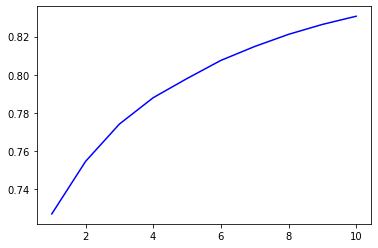

In [9]:
# make a plot
plt.plot(epoches_array,mb_score_array,'b')
plt.show()

# 참고자료
- sigmoid의 약점 : https://stats.stackexchange.com/questions/237169/why-are-non-zero-centered-activation-functions-a-problem-in-backpropagation
- 활성화 함수와 가중치 초기화 : https://excelsior-cjh.tistory.com/177